In [92]:
from pyprojroot import here
import pandas as pd
from pathlib import Path
import json

from pprint import pprint

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
# up figure resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

## Test drills

In [93]:
folder = here() / 'data/raw/fast-teams-twitter-data/01-etatyo/'
example_path = folder / "1237122416809295872.json"

with open (example_path, 'r') as f:
    file = json.load(f)

pprint(file.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])


In [94]:
file['user']['screen_name']

'MarikaVanska'

In [95]:
file['entities']['user_mentions']

[{'screen_name': 'minnahuoti',
  'name': 'Minna Huotilainen',
  'id': 432396811,
  'id_str': '432396811',
  'indices': [3, 14]}]

## Inspector

In [96]:
data = pd.DataFrame()

pathlist = Path(folder).glob('*.json')
files = [x.name for x in pathlist]

drop = widgets.Dropdown(
            options=files,
            description='files',
            disabled=False,
    )
display(drop)

Dropdown(description='files', options=('1240556017949257728.json', '1240281984355774464.json', '12398153297879…

## Combine

In [97]:
tweets = list()
pathlist = Path(folder).glob('*.json')

for path in pathlist:
    print(path, end='\r')
    with open(path, 'r') as f:
        file = json.load(f)
        tweets.append(file)

## Network

In [98]:
# runvisualize.py

# # Looking into a tweet
# tweet = tweets['statuses'][0]
# print tweet['user']['screen_name']
# print tweet['entities']['user_mentions']
# for user in tweet['entities']['user_mentions']:
#   print user['screen_name']

# Tweets to tabular format
import pandas as pd
table = list()

import networkx as nx
network = nx.DiGraph()


for tweet in tweets:
  # print(tweet['full_text'])
  for mentioned in tweet['entities']['user_mentions']:
    user_from = tweet['user']['screen_name'].lower()
    user_to = mentioned['screen_name'].lower()
    if not network.has_edge(user_from,user_to):
        network.add_edge(user_from,user_to,weight=0)
    network[user_from][user_to]['weight'] += 1

nx.readwrite.gexf.write_gexf(network,
                            here() / 'results/network.gexf',
                            encoding='utf-8',
                            version='1.2draft')

# df = pd.DataFrame(rows)
# df.to_csv('data/tweets-6aika.csv',encoding='utf-8')

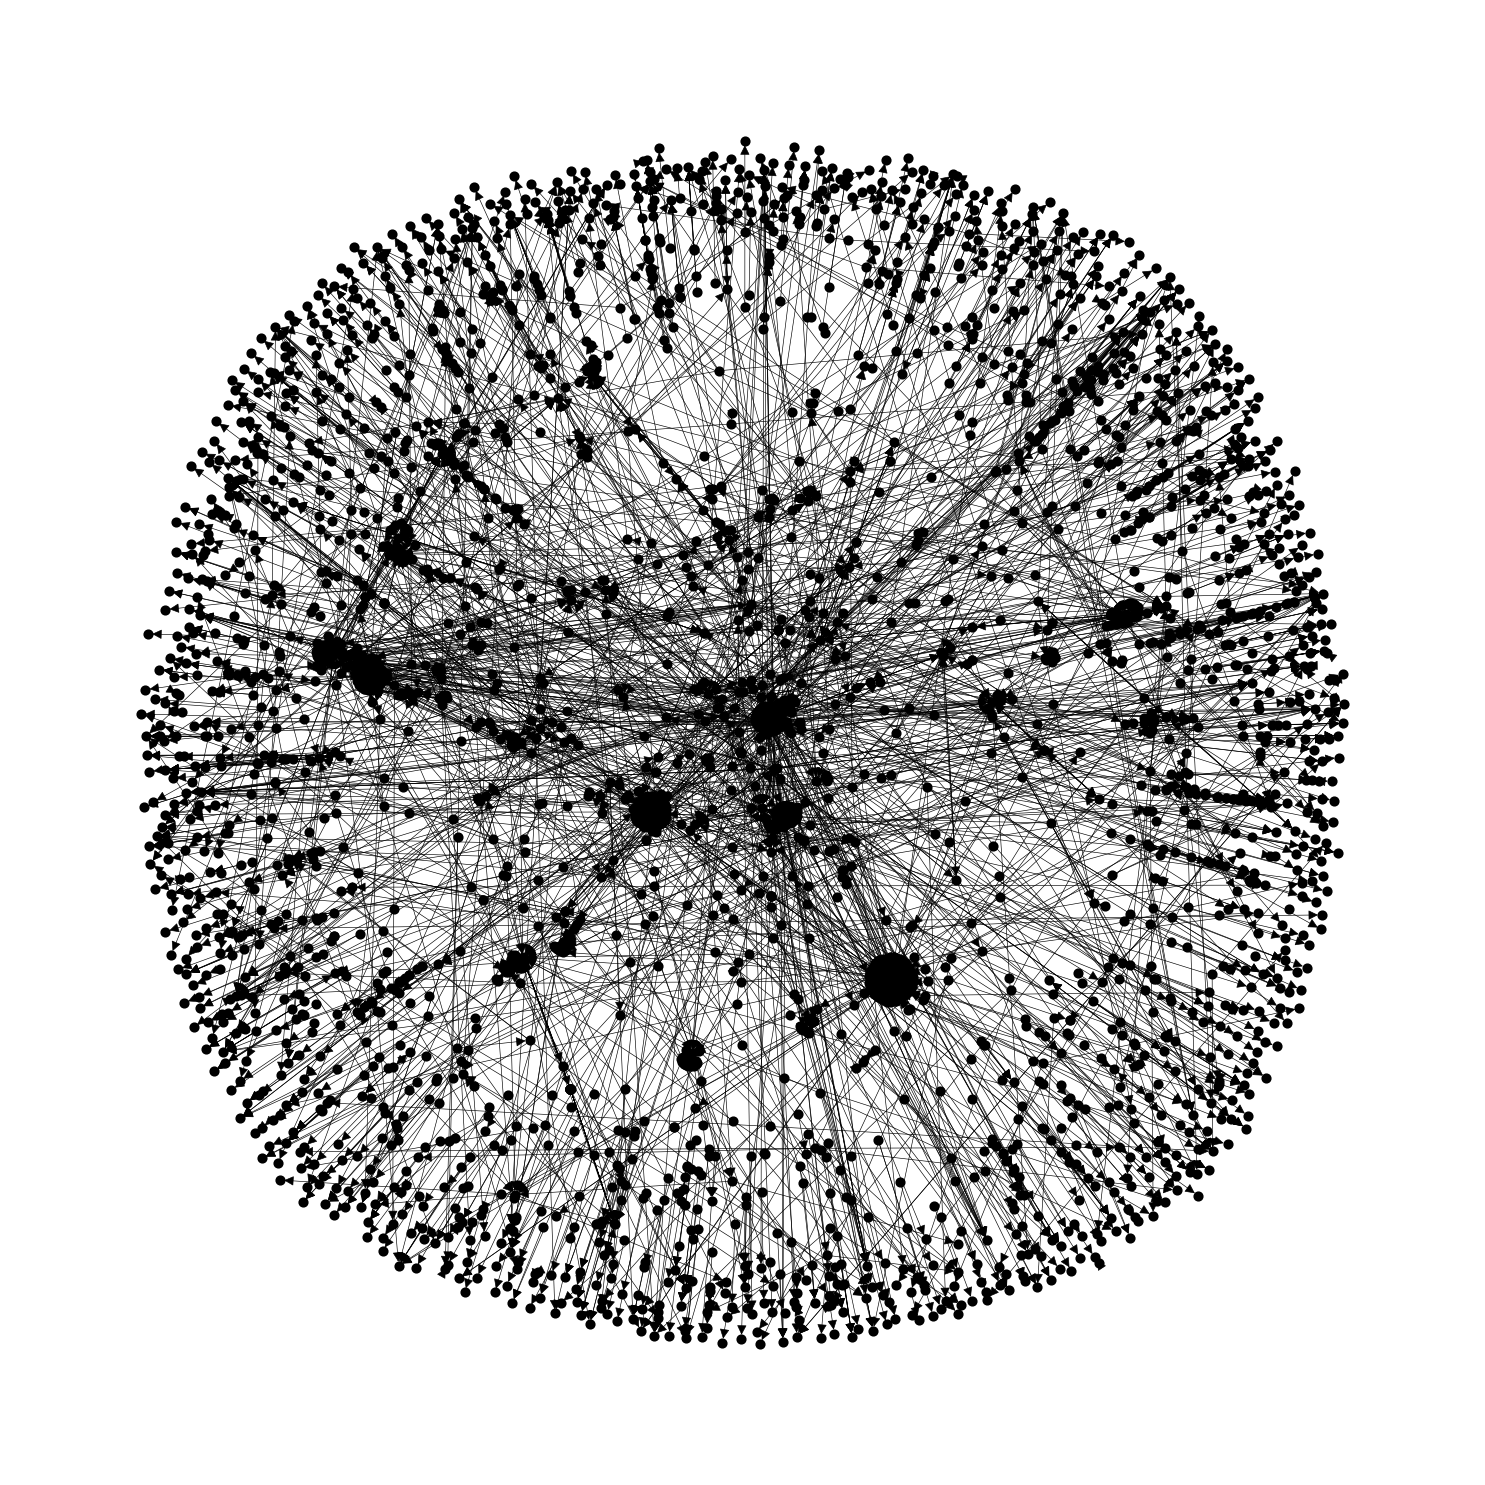

In [117]:
# https://www.databentobox.com/2019/07/28/facebook-friend-graph/
pos = nx.spring_layout(network)
plt.figure(figsize=(10,10))
nx.draw_networkx(network, with_labels=False, node_size=15, width=.3, pos=pos, edgecolor='grey', node_color='k', font_size=6)
limits=plt.axis('off') # turn of axisb
plt.tight_layout()
plt.savefig(here() / 'results/figures/2020-03-20-network.png', transparent=True)

## Networkx with Pyvis

In [125]:
import pyvis

from pyvis.network import Network
import networkx as nx

G = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white")
G.from_nx(network)
G.barnes_hut()
G.show('interactive_net.html')

## Networkx with Bokeh

In [115]:
import networkx as nx

from bokeh.io import output_file, show, output_notebook
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

output_notebook()

# Prepare Data
G = network

SAME_CLUB_COLOR, DIFFERENT_CLUB_COLOR = "black", "red"
edge_attrs = {}

#for start_node, end_node, _ in G.edges(data=True):
#    edge_color = SAME_CLUB_COLOR if G.nodes[start_node]["club"] == G.nodes[end_node]["club"] else DIFFERENT_CLUB_COLOR
#    edge_attrs[(start_node, end_node)] = edge_color

#nx.set_edge_attributes(G, edge_attrs, "edge_color")

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph Interaction Demonstration"

#node_hover_tool = HoverTool(tooltips=[("index", "@index"), ("club", "@club")])
#plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.edge_renderer.glyph = MultiLine(line_color="blue", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

show(plot)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "line_color" value "k" [renderer: GlyphRenderer(id=1822, glyph=MultiLine(id='1830', ...), ...)]


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "line_color" value "k" [renderer: GlyphRenderer(id=1822, glyph=MultiLine(id='1830', ...), ...)]
